In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройки отображения
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('display.max_columns', None)

In [3]:
# Загрузка данных
df = pd.read_csv('provider_churn_data.csv')

# Первые строки
df.head()

,customer_id,gender,age,tariff,tenure_months,monthly_fee,support_calls,has_debt,churn
0,CUST0001,Male,34,Basic,4,399,4,0,0
1,CUST0002,Female,26,Premium,30,961,1,0,0
2,CUST0003,Male,50,Basic,6,436,1,0,1
3,CUST0004,Male,37,Basic,46,306,1,0,0
4,CUST0005,Male,30,Premium,54,1125,1,0,0


In [4]:
# Общая информация
df.info()

# Проверяем пропуски
df.isnull().sum()

# Статистика
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   object
 1   gender         1000 non-null   object
 2   age            1000 non-null   int64 
 3   tariff         1000 non-null   object
 4   tenure_months  1000 non-null   int64 
 5   monthly_fee    1000 non-null   int64 
 6   support_calls  1000 non-null   int64 
 7   has_debt       1000 non-null   int64 
 8   churn          1000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 70.4+ KB


,age,tenure_months,monthly_fee,support_calls,has_debt,churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.799000,30.205000,623.946000,1.462000,0.130000,0.151000
std,15.133857,16.808197,236.137786,1.164436,0.336472,0.358228
min,18.000000,1.000000,300.000000,0.000000,0.000000,0.000000
25%,31.000000,16.000000,431.750000,1.000000,0.000000,0.000000
50%,44.000000,30.000000,591.000000,1.000000,0.000000,0.000000
75%,57.000000,45.000000,749.250000,2.000000,0.000000,0.000000
max,69.000000,59.000000,1199.000000,6.000000,1.000000,1.000000


Общий уровень оттока: 15.10%


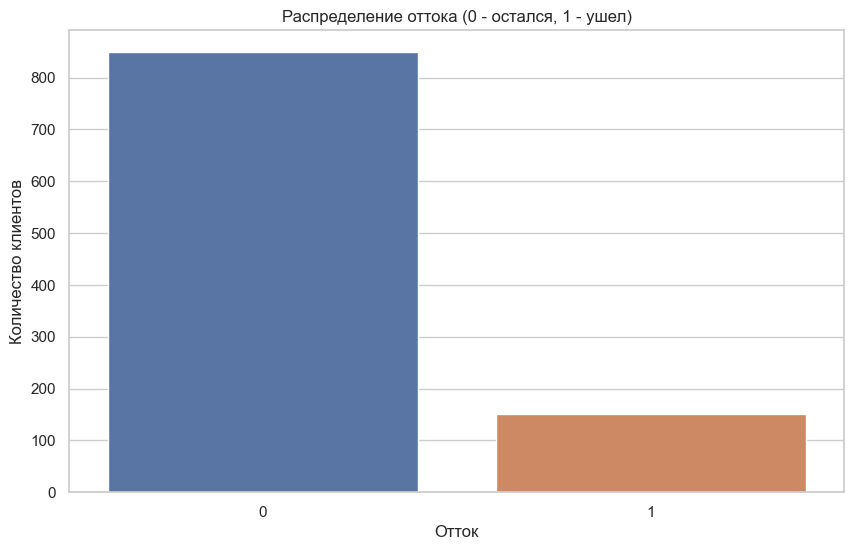

In [5]:
# Распределение оттока
churn_rate = df['churn'].mean()
print(f"Общий уровень оттока: {churn_rate:.2%}")

sns.countplot(data=df, x='churn')
plt.title('Распределение оттока (0 - остался, 1 - ушел)')
plt.xlabel('Отток')
plt.ylabel('Количество клиентов')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

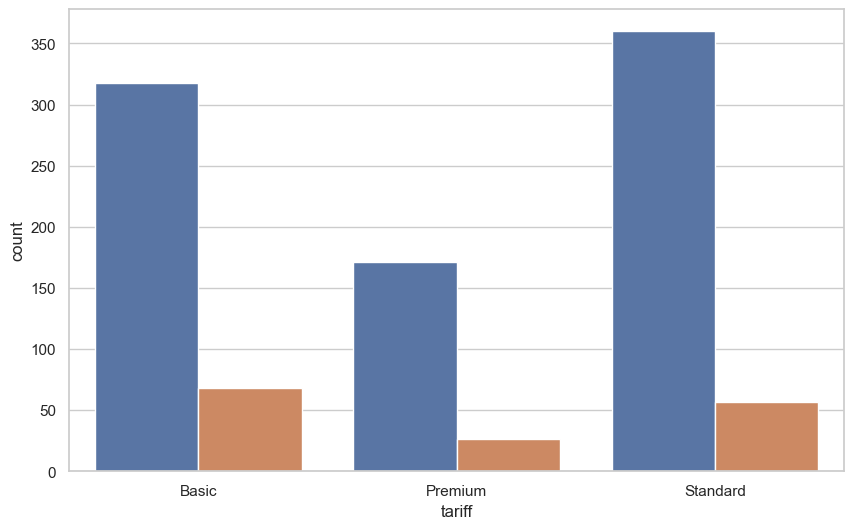

In [6]:
# Распределение по тарифам и оттоку
sns.countplot(data=df, x='tariff', hue='churn')
plt.title('Отток по тарифным планам')
plt.xlabel('Тариф')
plt.ylabel('Количество клиентов')
plt.legend(title='Churn')
plt.show()

# Уровень оттока по тарифам
churn_by_tariff = df.groupby('tariff')['churn'].mean().sort_values()
churn_by_tariff.plot(kind='bar', color='salmon', title='Уровень оттока по тарифам')
plt.ylabel('Доля ушедших клиентов')
plt.show()

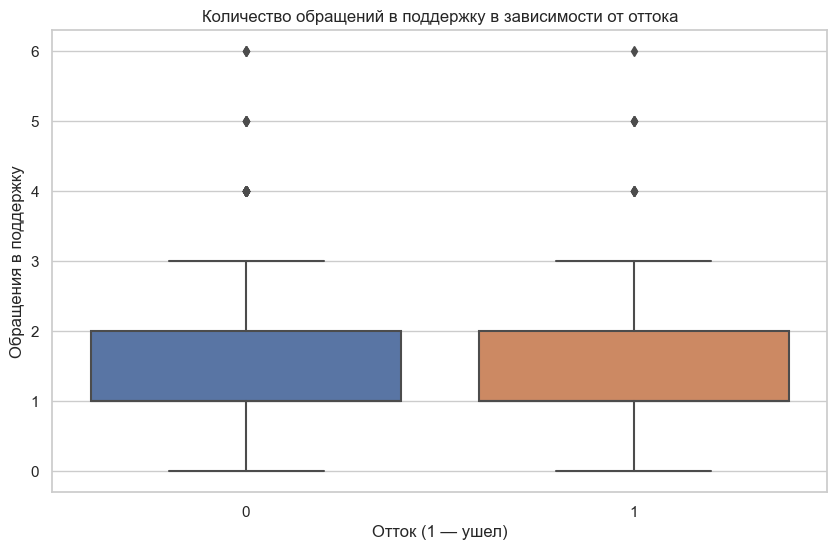

churn
0    1.460542
1    1.470199
Name: support_calls, dtype: float64

In [7]:
sns.boxplot(data=df, x='churn', y='support_calls')
plt.title('Количество обращений в поддержку в зависимости от оттока')
plt.xlabel('Отток (1 — ушел)')
plt.ylabel('Обращения в поддержку')
plt.show()

# Среднее количество обращений
df.groupby('churn')['support_calls'].mean()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

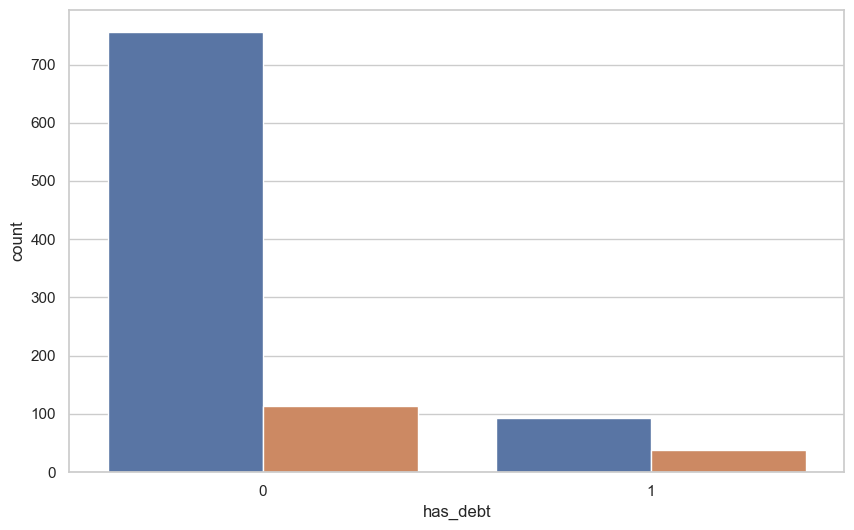

In [8]:
sns.countplot(data=df, x='has_debt', hue='churn')
plt.title('Задолженность и отток')
plt.xlabel('Наличие задолженности (1 — есть)')
plt.ylabel('Количество клиентов')
plt.legend(title='Отток')
plt.show()

# Уровень оттока у клиентов с задолженностью
df.groupby('has_debt')['churn'].mean()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


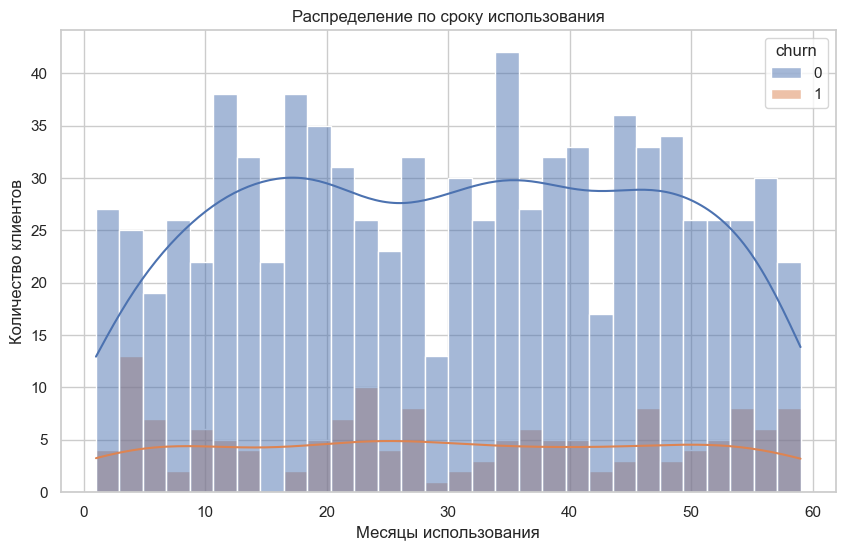

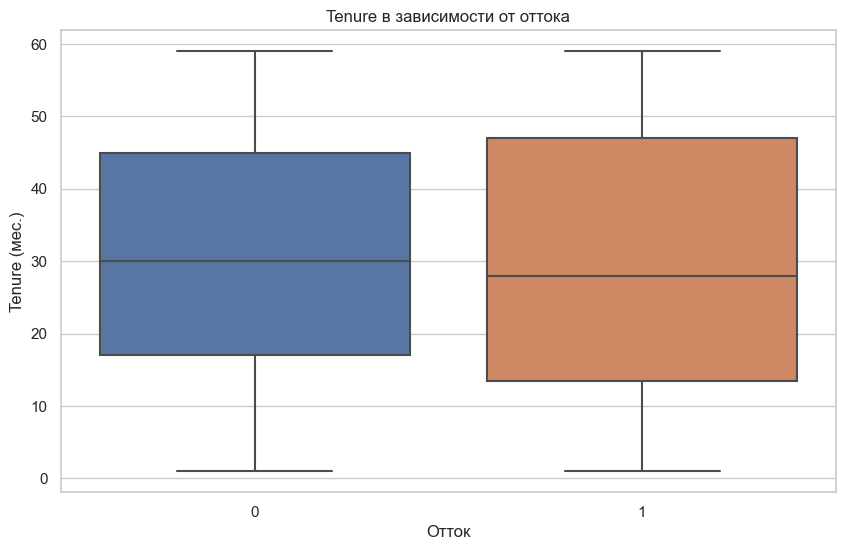

In [9]:
sns.histplot(data=df, x='tenure_months', hue='churn', kde=True, bins=30)
plt.title('Распределение по сроку использования')
plt.xlabel('Месяцы использования')
plt.ylabel('Количество клиентов')
plt.show()

# Boxplot
sns.boxplot(data=df, x='churn', y='tenure_months')
plt.title('Tenure в зависимости от оттока')
plt.xlabel('Отток')
plt.ylabel('Tenure (мес.)')
plt.show()

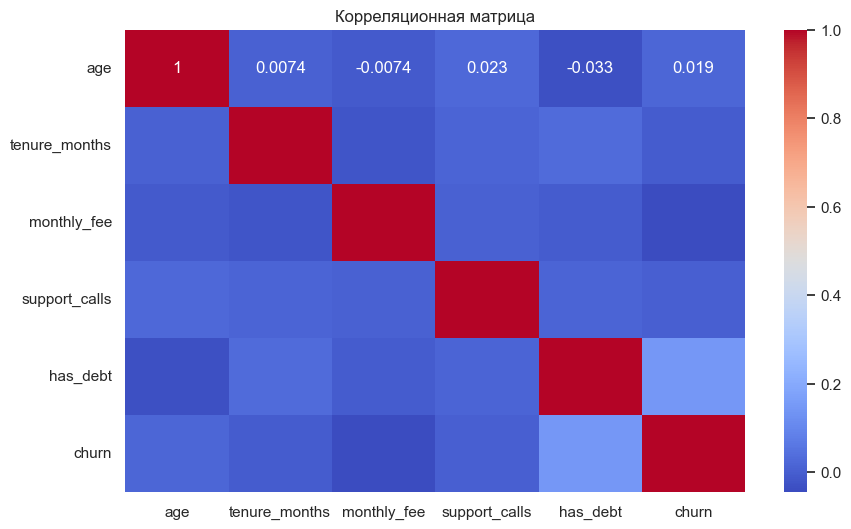

In [10]:
# Корреляционная матрица
corr_matrix = df[['age', 'tenure_months', 'monthly_fee', 'support_calls', 'has_debt', 'churn']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [11]:
# Хи-квадрат тест
contingency = pd.crosstab(df['has_debt'], df['churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p-значение: {p:.4f} — {'Существенная связь' if p < 0.05 else 'Нет существенной связи'}")

p-значение: 0.0000 — Существенная связь


In [12]:
from IPython.display import Markdown as md

md("""
## 📌 Выводы:

- **Общий уровень оттока:** {:.2f}%
- **Наибольший отток** наблюдается у клиентов на тарифе *Basic*
- **Задолженность и частые обращения в поддержку** значительно увеличивают вероятность оттока
- **Клиенты с коротким сроком использования (<6 месяцев)** чаще уходят

## 🛠 Рекомендации:

- Создать программы лояльности для новых клиентов
- Пересмотреть наполнение тарифа *Basic* — он убыточен по оттоку
- Улучшить качество службы поддержки
- Работа с должниками: рассрочки, уведомления, скидки

""".format(churn_rate * 100))


## 📌 Выводы:

- **Общий уровень оттока:** 15.10%
- **Наибольший отток** наблюдается у клиентов на тарифе *Basic*
- **Задолженность и частые обращения в поддержку** значительно увеличивают вероятность оттока
- **Клиенты с коротким сроком использования (<6 месяцев)** чаще уходят

## 🛠 Рекомендации:

- Создать программы лояльности для новых клиентов
- Пересмотреть наполнение тарифа *Basic* — он убыточен по оттоку
- Улучшить качество службы поддержки
- Работа с должниками: рассрочки, уведомления, скидки

